### **Advanced Regression Assignment -  Housing Price Prediction**
                                -- by RB kishore promod 
### ____________________________________________________________
##### __A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### **The company wants to know:** <br>
* Which variables are significant in predicting the price of a house 
* How well those variables describe the price of a house
* Determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

import os

# working with pandas
pd.options.display.max_rows = 10000

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### **1. Understanding the Data**

In [2]:
#reading the dataset
house_cp = pd.read_csv("train.csv")
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# summary of the dataset: 1460 rows, 81  columns
# float64(3), int64(35), object(43)
# SalePrice would be our target variable

print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **2. Data Cleaning**

#### **2.1 Removing Null values**

In [4]:
#Removing Columns that has more than 80% redundant data
Col_null_80_per_more = [i for i in house.columns if house[i].isnull().sum() > 0.8* (house.shape[0])]
print(Col_null_80_per_more)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
#dropping the same 
house.drop(labels=Col_null_80_per_more, axis=1,inplace=True)

In [6]:
display(house.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### **2.2 Removing Zero values**

In [7]:
# Count number of zeros in all columns of Dataframe
for column_name in house.columns:
    column = house[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Id  is :  0
Count of zeros in column  MSSubClass  is :  0
Count of zeros in column  MSZoning  is :  0
Count of zeros in column  LotFrontage  is :  0
Count of zeros in column  LotArea  is :  0
Count of zeros in column  Street  is :  0
Count of zeros in column  LotShape  is :  0
Count of zeros in column  LandContour  is :  0
Count of zeros in column  Utilities  is :  0
Count of zeros in column  LotConfig  is :  0
Count of zeros in column  LandSlope  is :  0
Count of zeros in column  Neighborhood  is :  0
Count of zeros in column  Condition1  is :  0
Count of zeros in column  Condition2  is :  0
Count of zeros in column  BldgType  is :  0
Count of zeros in column  HouseStyle  is :  0
Count of zeros in column  OverallQual  is :  0
Count of zeros in column  OverallCond  is :  0
Count of zeros in column  YearBuilt  is :  0
Count of zeros in column  YearRemodAdd  is :  0
Count of zeros in column  RoofStyle  is :  0
Count of zeros in column  RoofMatl  is :  0
Count of

In [8]:
#Dropping columns that has >80 of Zeros
Zeros_columns=['MiscVal','PoolArea','ScreenPorch','3SsnPorch','LowQualFinSF','EnclosedPorch','BsmtHalfBath','BsmtFinSF2']
house.drop(labels=Zeros_columns, axis=1,inplace=True)

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### **3. Data Processing & Visualization to understand the variables**

In [10]:
# converting years to categorical
house['YearBuilt'] = house['YearBuilt'].astype('object')
house['YearRemodAdd'] = house['YearRemodAdd'].astype('object')
house['GarageYrBlt'] = house['GarageYrBlt'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### **3.1 YearBuilt vs YearRemodAdd vs GarageYrBlt**

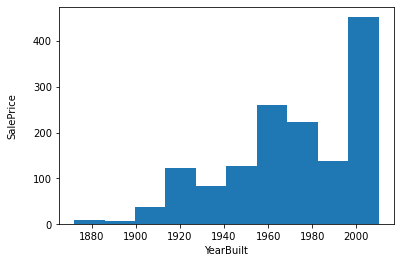

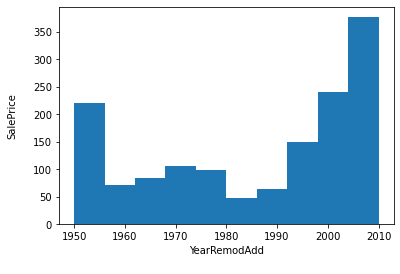

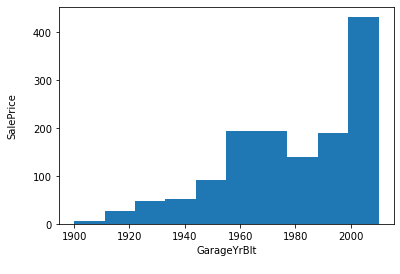

In [11]:
#YearBuilt vs YearRemodAdd vs GarageYrBlt

plt.hist(house["YearBuilt"])
plt.xlabel('YearBuilt\n', fontsize = 10)
plt.ylabel('SalePrice\n', fontsize = 10)
plt.show()

plt.hist(house["YearRemodAdd"])
plt.xlabel('YearRemodAdd\n', fontsize = 10)
plt.ylabel('SalePrice\n', fontsize = 10)
plt.show()


plt.hist(house["GarageYrBlt"])
plt.xlabel('GarageYrBlt\n', fontsize = 10)
plt.ylabel('SalePrice\n', fontsize = 10)
plt.show()



In [12]:
#YearBuilt & GarageYrBlt correlates same, dropping "GarageYrBlt"
house.drop(labels='GarageYrBlt', axis=1,inplace=True)

In [13]:
# converting OverallCon to OverallQual to Categorical
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

#### **3.2 Condition1 vs Condition2**

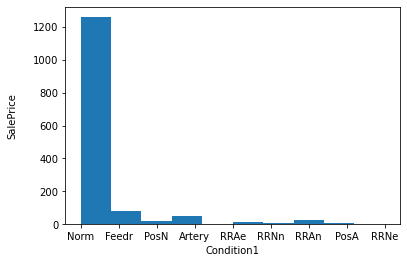

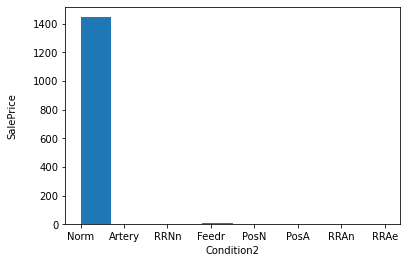

In [14]:
#Condition1 vs Condition2 on SalePrice

plt.hist(house["Condition1"])
plt.xlabel('Condition1\n', fontsize = 10)
plt.ylabel('SalePrice\n', fontsize = 10)

plt.show()

plt.hist(house["Condition2"])
plt.xlabel('Condition2\n', fontsize = 10)
plt.ylabel('SalePrice\n', fontsize = 10)
plt.show()



In [15]:
#Condition1 vs Condition2 correlates same, dropping Condition2
house.drop(labels='Condition2', axis=1,inplace=True)

#### **3.3 OverallQual vs OveralCond**

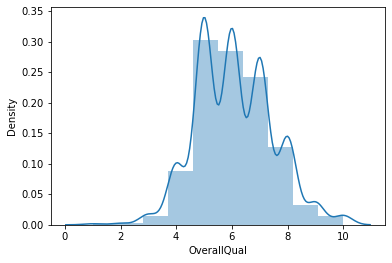

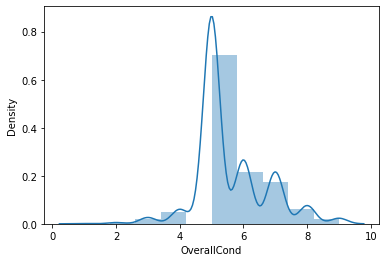

In [16]:
#Checking the distribution of OverallQual & OverallCond

sns.distplot(house.OverallQual,bins=10)

plt.show()

sns.distplot(house.OverallCond,bins=10)

plt.show()


In [17]:
#Converting rating (0-10) to its actual values
house['OverallQual']= house.OverallQual.map({10:'V_Excellent', 9:'Excellent', 8:'V_Good', 7:'Good', 6:'Above_Average', 5:'Average', 4:'Below_Average', 3:'Fair', 2:'Poor', 1:'V_Poor'})
house['OverallCond']= house.OverallCond.map({10:'V_Excellent', 9:'Excellent', 8:'V_Good', 7:'Good', 6:'Above_Average', 5:'Average', 4:'Below_Average', 3:'Fair', 2:'Poor', 1:'V_Poor'})


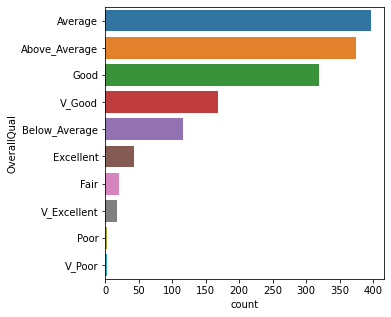

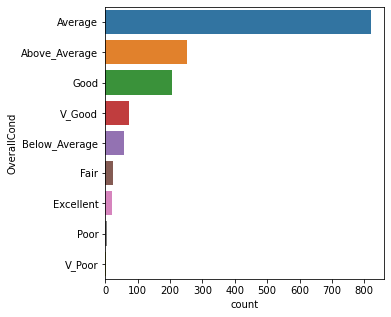

In [18]:
#plotting to count no.of Average/Good/V_Good 
plt.figure(figsize=(5,5))
sns.countplot(y="OverallQual", data=house,order = house['OverallQual'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="OverallCond", data=house,order = house['OverallCond'].value_counts().index)
plt.show()

#Average & Above average & Good occurencies more 


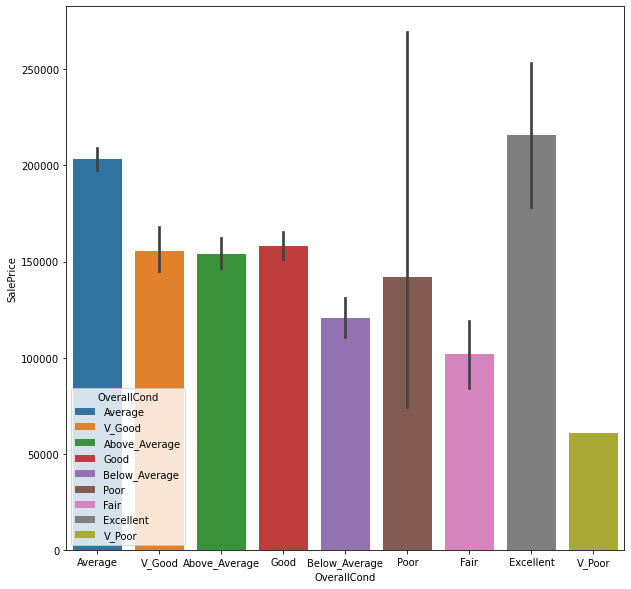

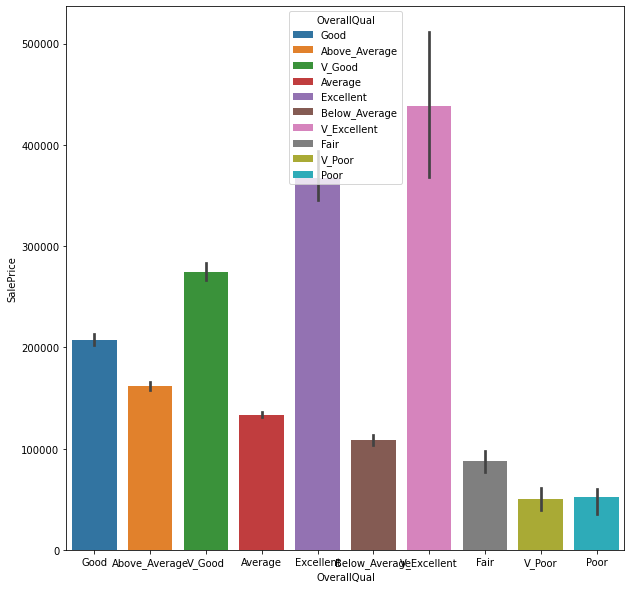

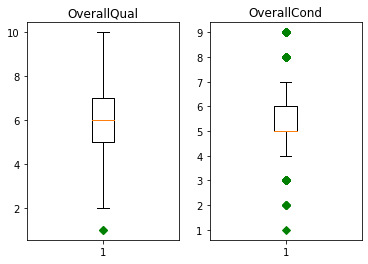

In [19]:
#QverallQual & OverallCond on SalePrice
plt.figure(figsize=(10,10))
sns.barplot(data=house, y="SalePrice", x='OverallCond', hue='OverallCond', dodge=False)
plt.show()

plt.figure(figsize=(10,10))
sns.barplot(data=house, y="SalePrice", x='OverallQual', hue='OverallQual', dodge=False)
plt.show()



#Checking the outliers in all features by doing EDA

fig, axs = plt.subplots(1,2)

#basicplot with highlighted outliers
axs[0].boxplot(house_cp.OverallQual, 0 , 'gD')
axs[0].set_title('OverallQual')

axs[1].boxplot(house_cp.OverallCond, 0 , 'gD')
axs[1].set_title('OverallCond')

plt.show()


#OverallQual & OverallCon correlates same, OverallCon can be dropped.
#Also box plot shows OverallCon has skewness due to outliers


In [20]:
#OverallQual better data than OverallCond, dropping the same
house.drop(labels='OverallCond', axis=1,inplace=True)

#### **3.3 Exterior1st vs Exterior2nd**

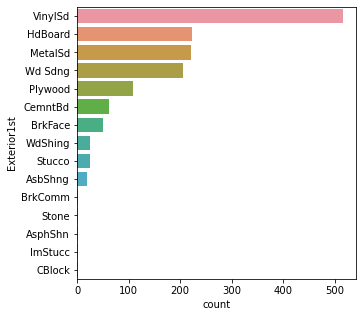

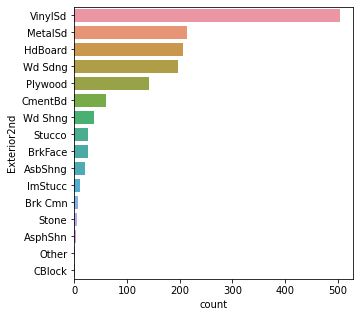

In [21]:
#Exterior1st vs Exterior2nd

plt.figure(figsize=(5,5))
sns.countplot(y="Exterior1st", data=house,order = house['Exterior1st'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="Exterior2nd", data=house,order = house['Exterior2nd'].value_counts().index)
plt.show()


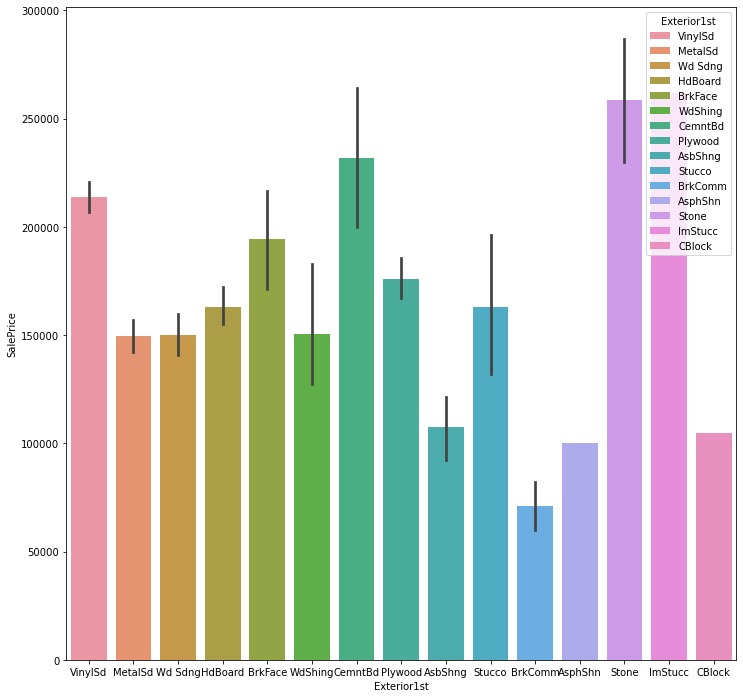

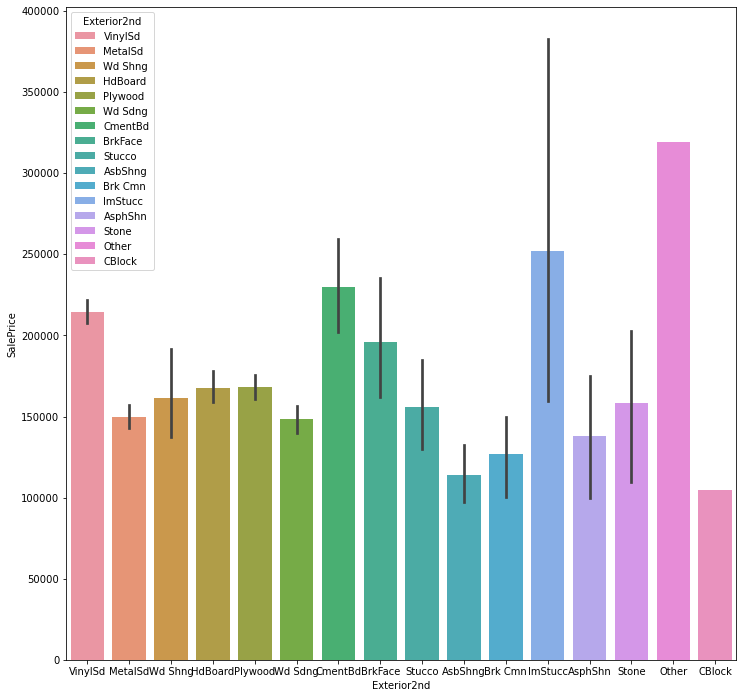

In [22]:
#Exterior1 & 2nd correlates with SalePrice
plt.figure(figsize=(12,12))
sns.barplot(data=house, y="SalePrice", x='Exterior1st', hue='Exterior1st', dodge=False)
plt.show()

plt.figure(figsize=(12,12))
sns.barplot(data=house, y="SalePrice", x='Exterior2nd', hue='Exterior2nd', dodge=False)
plt.show()



In [23]:
#Exterior 1 & 2 correlates the same, exterior 2nd can be dropped
house.drop(labels='Exterior2nd', axis=1,inplace=True)

#### **3.4 OverallQual vs OveralCond**

In [24]:
#ExterQual vs ExterCond

house['ExterQual']= house.ExterQual.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor'})
house['ExterCond']= house.ExterCond.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor'})


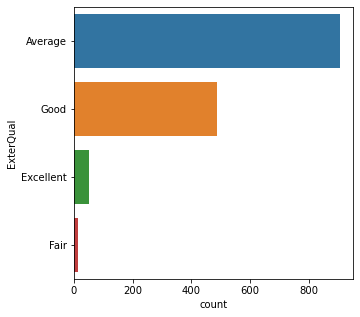

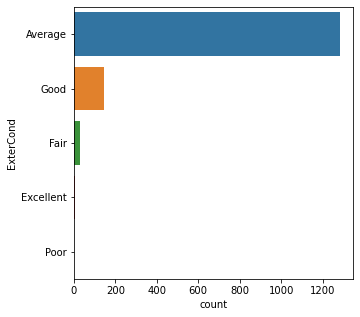

In [25]:
#ExterQual vs ExterCond
plt.figure(figsize=(5,5))
sns.countplot(y="ExterQual", data=house,order = house['ExterQual'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="ExterCond", data=house,order = house['ExterCond'].value_counts().index)
plt.show()

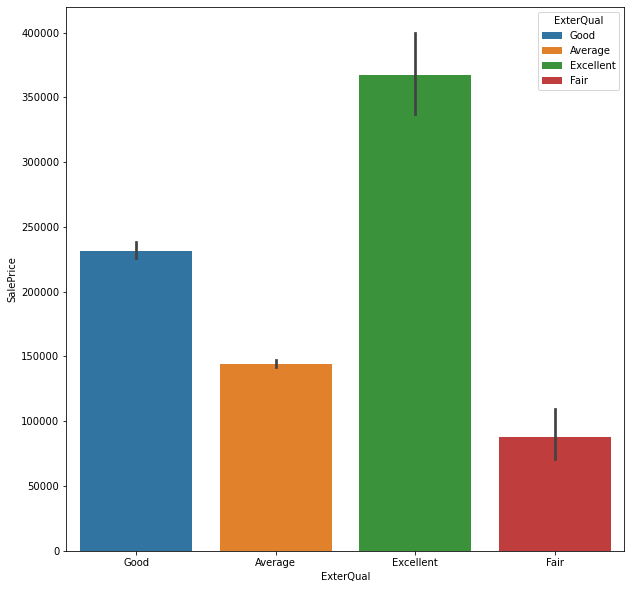

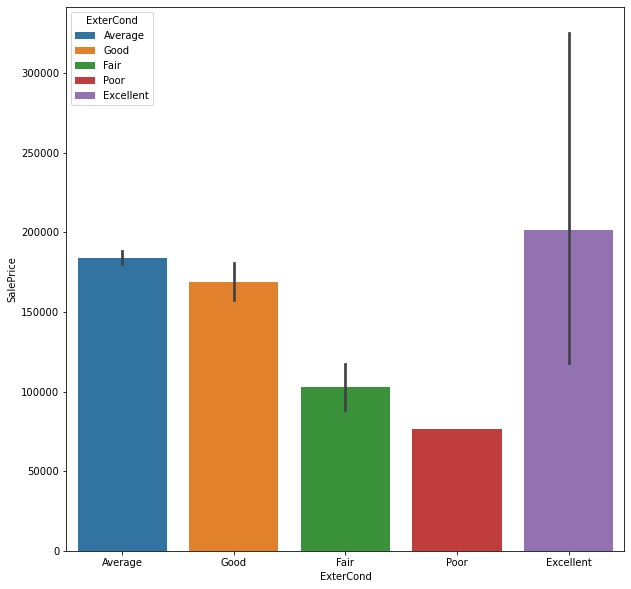

In [26]:
#check what is the SalePrice of average house by using ExterQual & ExterCond
plt.figure(figsize=(10,10))
sns.barplot(data=house, y="SalePrice", x='ExterQual', hue='ExterQual', dodge=False)
plt.show()

plt.figure(figsize=(10,10))
sns.barplot(data=house, y="SalePrice", x='ExterCond', hue='ExterCond', dodge=False)
plt.show()

In [27]:
#Drop ExterCond as it correlates the same with ExterQual
house.drop(labels='ExterCond', axis=1,inplace=True)

#### **3.5 OverallQual vs OveralCond**

In [28]:
house['BsmtFinType1']= house.BsmtFinType1.map({'GLQ':'Good', 'ALQ':'Average', 'BLQ':'Below_Average', 'Rec':'Average_Rec', 'LwQ':'Poor', 'Unf':'Unfinished', 'NoBasement':'NoBasement'})
house['BsmtFinType2']= house.BsmtFinType2.map({'GLQ':'Good', 'ALQ':'Average', 'BLQ':'Below_Average', 'Rec':'Average_Rec', 'LwQ':'Poor', 'Unf':'Unfinished', 'NoBasement':'NoBasement'})


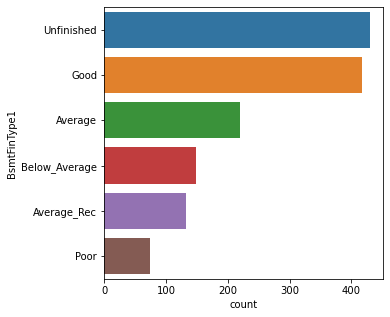

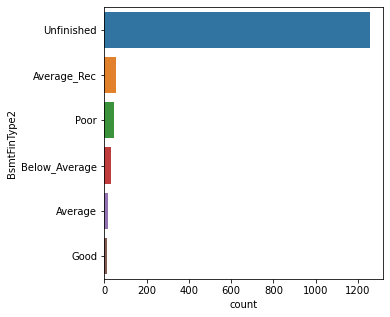

In [29]:
# check BsmtFinType1 vs BsmtFinType2
#ExterQual vs ExterCond
plt.figure(figsize=(5,5))
sns.countplot(y="BsmtFinType1", data=house,order = house['BsmtFinType1'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="BsmtFinType2", data=house,order = house['BsmtFinType2'].value_counts().index)
plt.show()


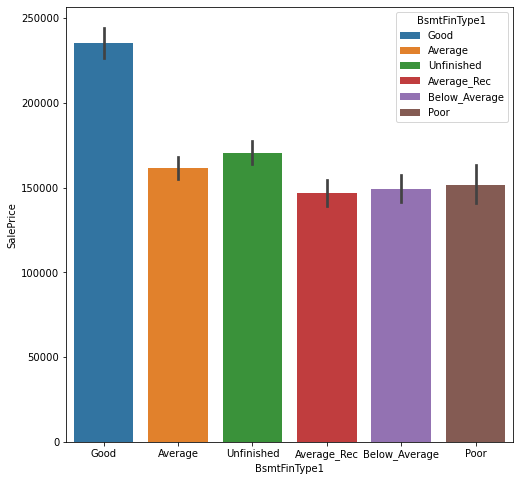

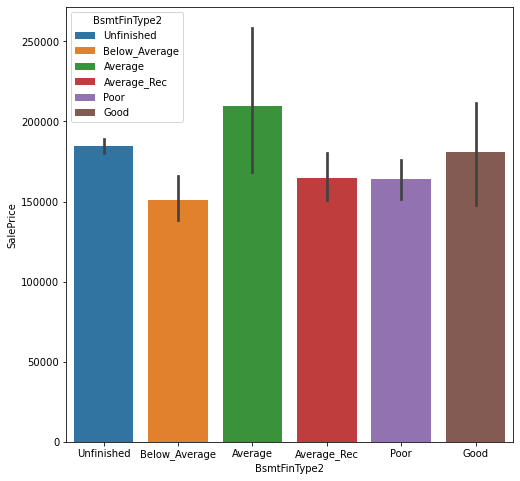

In [30]:
#Exterior1 & 2nd on SalePrice
plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='BsmtFinType1', hue='BsmtFinType1', dodge=False)
plt.show()

plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='BsmtFinType2', hue='BsmtFinType2', dodge=False)
plt.show()

#### **3.6 BsmtQual vs BsmtCond**

In [31]:
#BsmtQual Vs BsmtCond
house['BsmtQual'] = house['BsmtQual'].replace(np.nan,'NoBasement')
house['BsmtCond'] = house['BsmtCond'].replace(np.nan,'NoBasement')

In [32]:
#BsmtQual Vs BsmtCond
house['BsmtQual']= house.BsmtQual.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor', 'NoBasement':'NoBasement'})
house['BsmtCond']= house.BsmtCond.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor', 'NoBasement':'NoBasement'})

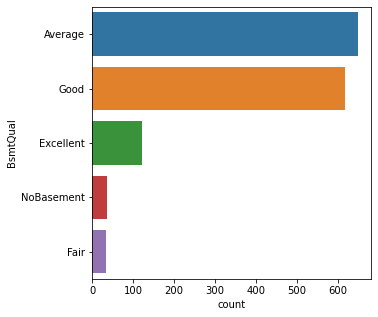

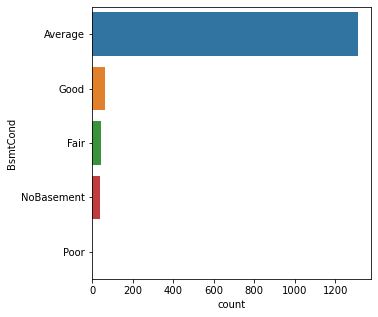

In [33]:
#visualize BsmtQual Vs BsmtCond
plt.figure(figsize=(5,5))
sns.countplot(y="BsmtQual", data=house,order = house['BsmtQual'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="BsmtCond", data=house,order = house['BsmtCond'].value_counts().index)
plt.show()

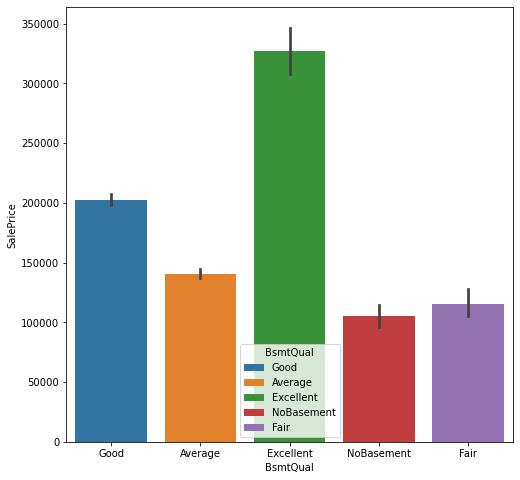

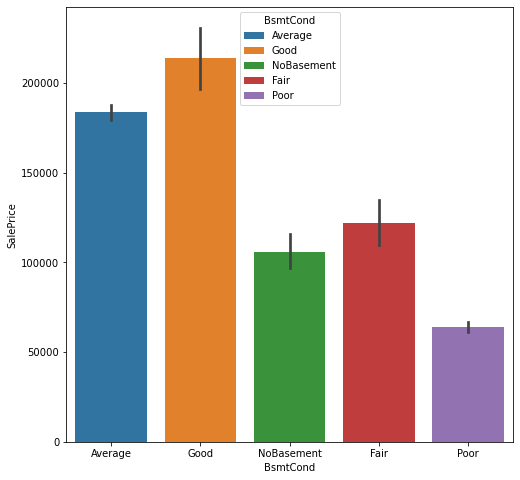

In [34]:
# BsmtQual vs BsmtCond on SalePrice
plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='BsmtQual', hue='BsmtQual', dodge=False)
plt.show()

plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='BsmtCond', hue='BsmtCond', dodge=False)
plt.show()



In [35]:
#BsmtQual and BsmtCon correlates same, hence dropping BsmntCond due to lack of data spread across categories
house.drop(labels='BsmtCond', axis=1,inplace=True)

#### **3.7 GarageQuall vs GarageCond**

In [36]:
#GarageQuall vs GarageCond
house['GarageQual'] = house['GarageQual'].replace(np.nan,'NoGarage')
house['GarageCond'] = house['GarageCond'].replace(np.nan,'NoGarage')

In [37]:
#GarageQuall vs GarageCond
house['GarageQual']= house.GarageQual.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor', 'NoGarage':'NoGarage'})
house['GarageCond']= house.GarageCond.map({'Ex':'Excellent', 'Gd':'Good', 'TA':'Average', 'Fa':'Fair', 'Po':'Poor', 'NoGarage':'NoGarage'})

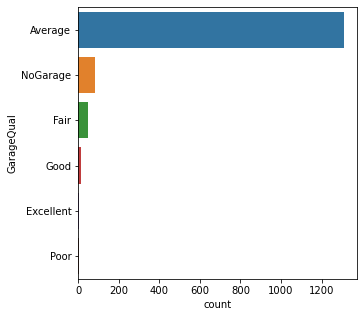

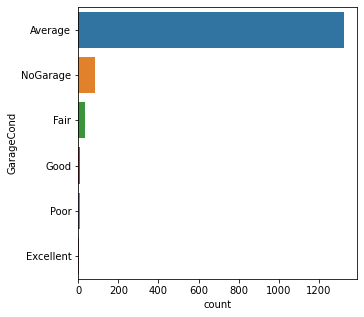

In [38]:
#GarageQuall vs GarageCond on SalePrice

plt.figure(figsize=(5,5))
sns.countplot(y="GarageQual", data=house,order = house['GarageQual'].value_counts().index)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(y="GarageCond", data=house,order = house['GarageCond'].value_counts().index)
plt.show()

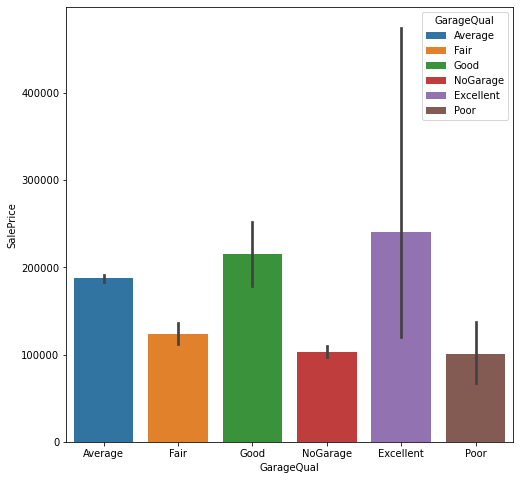

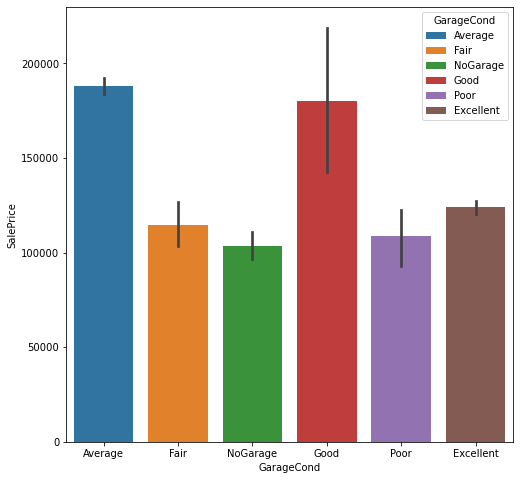

In [39]:
#GarageQuall vs GarageCond on SalePrice
plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='GarageQual', hue='GarageQual', dodge=False)
plt.show()

plt.figure(figsize=(8,8))
sns.barplot(data=house, y="SalePrice", x='GarageCond', hue='GarageCond', dodge=False)
plt.show()


In [40]:
#GarageQuall vs GarageCond correlates the same, dropping GarageCond
house.drop(labels='GarageCond', axis=1,inplace=True)

#### **3.8 MoSold vs YrOld**

In [41]:
#converting MoSold, MoSold to categorical variable
house['MoSold'] = house['MoSold'].astype('object')
house['YrSold'] = house['YrSold'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  YearBuilt      1460 non-null   object 
 17  YearRemodAdd   1460 non-null   object 
 18  RoofStyl

In [42]:
house = house.rename(columns={'1stFlrSF': 'fstFlrSF', '2ndFlrSF': 'ScnFlrSF'})

#### **3.9 correlation matrix**

In [43]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,fstFlrSF,ScnFlrSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,60,65.0,8450,196.0,706,150,856,856,854,...,1,3,1,8,0,2,548,0,61,208500
1,2,20,80.0,9600,0.0,978,284,1262,1262,0,...,0,3,1,6,1,2,460,298,0,181500
2,3,60,68.0,11250,162.0,486,434,920,920,866,...,1,3,1,6,1,2,608,0,42,223500
3,4,70,60.0,9550,0.0,216,540,756,961,756,...,0,3,1,7,1,3,642,0,35,140000
4,5,60,84.0,14260,350.0,655,490,1145,1145,1053,...,1,4,1,9,1,3,836,192,84,250000


In [44]:
house_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'fstFlrSF', 'ScnFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [45]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,fstFlrSF,ScnFlrSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.050298,-0.005024,-0.007940,-0.015415,0.010496,0.005590,...,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.022936,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,...,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.193458,0.233633,0.132644,0.392075,0.457181,0.080177,...,0.053532,0.263170,-0.006069,0.352096,0.266639,0.285691,0.344997,0.088521,0.151972,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.104160,0.214103,-0.002618,0.260833,0.299475,0.050986,...,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.263843
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,...,0.201444,0.102821,-0.037610,0.280682,0.249070,0.364204,0.373066,0.159718,0.125703,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,...,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,...,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,...,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.613581
fstFlrSF,0.010496,-0.251758,0.457181,0.299475,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,...,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.605852
ScnFlrSF,0.005590,0.307886,0.080177,0.050986,0.174561,-0.137079,0.004469,-0.174512,-0.202646,1.000000,...,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.319334


In [46]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Id to SalePrice
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            23 non-null     float64
 1   MSSubClass    23 non-null     float64
 2   LotFrontage   23 non-null     float64
 3   LotArea       23 non-null     float64
 4   MasVnrArea    23 non-null     float64
 5   BsmtFinSF1    23 non-null     float64
 6   BsmtUnfSF     23 non-null     float64
 7   TotalBsmtSF   23 non-null     float64
 8   fstFlrSF      23 non-null     float64
 9   ScnFlrSF      23 non-null     float64
 10  GrLivArea     23 non-null     float64
 11  BsmtFullBath  23 non-null     float64
 12  FullBath      23 non-null     float64
 13  HalfBath      23 non-null     float64
 14  BedroomAbvGr  23 non-null     float64
 15  KitchenAbvGr  23 non-null     float64
 16  TotRmsAbvGrd  23 non-null     float64
 17  Fireplaces    23 non-null     float64
 18  GarageCars    23 non-null    

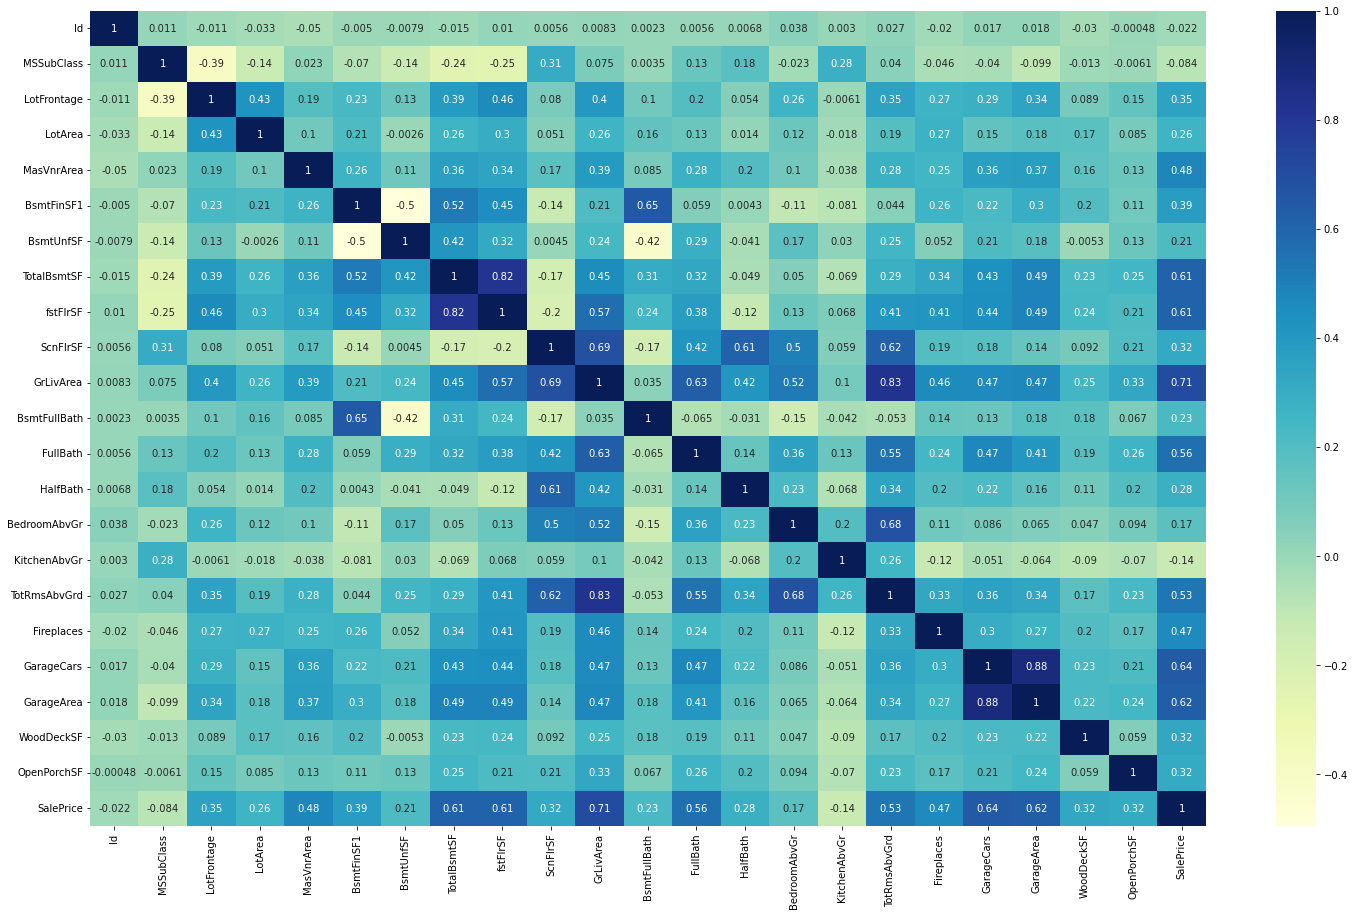

In [47]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


**Inference :**

**Positive & Negative correlation between Independent variables & Target variables:**
* Increase in TotalBsmtSF, GrLivArea, GarageArea affects SalePrice postively
* KitchenAbGrd, MSSubclass negatively impacts SalePrice


**Correlation among Independent variables:** 
* fstFlrSf vs TotalBsmtSF
* GarageCars vs GarageArea
* GrLivArea vs TotalRmsAbvGrd are correlated among themselves, hence removing either of them wont impact SalePrice a lot. 
 

In [48]:
#Dropping highly correlated independent variable among themselves
cor = house_numeric.drop(labels='fstFlrSF', axis=1,inplace=True)
cor = house_numeric.drop(labels='TotRmsAbvGrd', axis=1,inplace=True)
cor = house_numeric.drop(labels='GarageCars', axis=1,inplace=True)

house.drop(labels='fstFlrSF', axis=1,inplace=True)
house.drop(labels='TotRmsAbvGrd', axis=1,inplace=True)
house.drop(labels='GarageCars', axis=1,inplace=True)

In [49]:
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,ScnFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.050298,-0.005024,-0.007940,-0.015415,0.005590,0.008273,0.002289,0.005587,0.006784,0.037719,0.002951,-0.019772,0.017634,-0.029643,-0.000477,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.022936,-0.069836,-0.140759,-0.238518,0.307886,0.074853,0.003491,0.131608,0.177354,-0.023438,0.281721,-0.045569,-0.098672,-0.012579,-0.006100,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.193458,0.233633,0.132644,0.392075,0.080177,0.402797,0.100949,0.198769,0.053532,0.263170,-0.006069,0.266639,0.344997,0.088521,0.151972,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.104160,0.214103,-0.002618,0.260833,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.271364,0.180403,0.171698,0.084774,0.263843
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,1.000000,0.264736,0.114442,0.363936,0.174561,0.390857,0.085310,0.276833,0.201444,0.102821,-0.037610,0.249070,0.373066,0.159718,0.125703,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.264736,1.000000,-0.495251,0.522396,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.260011,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.114442,-0.495251,1.000000,0.415360,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.051575,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.363936,0.522396,0.415360,1.000000,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.339519,0.486665,0.232019,0.247264,0.613581
ScnFlrSF,0.005590,0.307886,0.080177,0.050986,0.174561,-0.137079,0.004469,-0.174512,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.059306,0.194561,0.138347,0.092165,0.208026,0.319334
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.390857,0.208171,0.240257,0.454868,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.100063,0.461679,0.468997,0.247433,0.330224,0.708624


In [50]:
#check Null for further process
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual           0
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
ScnFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType   

#### **3.9 Imputation**

In [51]:
#imputing data with its actual values
house['LotFrontage'] = house['LotFrontage'].replace(np.nan,'0')
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan,'NoBasement')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan,'NoBasement')
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan,'NoBasement')
house['Electrical'] = house['Electrical'].replace(np.nan,'NoElectrical')
house['FireplaceQu'] = house['FireplaceQu'].replace(np.nan,'NoFireplace')
house['GarageType'] = house['GarageType'].replace(np.nan,'NoGarage')
house['GarageFinish'] = house['GarageFinish'].replace(np.nan,'NoGarage')
house['MasVnrType'] = house['MasVnrType'].replace(np.nan,'NoMasonry')
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan,'0')

In [52]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   object
 16  YearBuilt      1460 non-null   object
 17  YearRemodAdd   1460 non-null   object
 18  RoofStyle      1460 non-null

In [53]:
#converting LotFrontage to int
house['LotFrontage'] = house['LotFrontage'].astype('int64')
house['MasVnrArea'] = house['MasVnrArea'].astype('int64')

In [54]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   object
 16  YearBuilt      1460 non-null   object
 17  YearRemodAdd   1460 non-null   object
 18  RoofStyle      1460 non-null

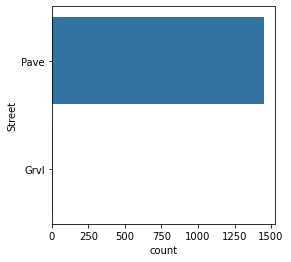

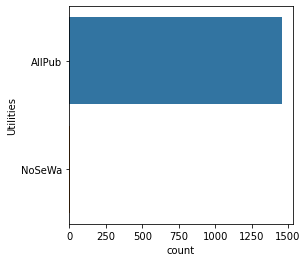

In [55]:
#Street & Utilities
plt.figure(figsize=(4,4))
sns.countplot(y="Street", data=house,order = house['Street'].value_counts().index)
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(y="Utilities", data=house,order = house['Utilities'].value_counts().index)
plt.show()

In [56]:
#Data having more occurencies on one category, so dropping Street & Utilities
house.drop(labels='Street', axis=1,inplace=True)
house.drop(labels='Utilities', axis=1,inplace=True)

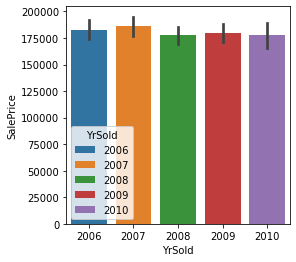

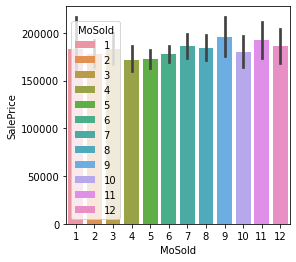

In [57]:
#MoSold vs YrSold. 
plt.figure(figsize=(4,4))
sns.barplot(data=house, y="SalePrice", x='YrSold', hue='YrSold', dodge=False)
plt.show()

plt.figure(figsize=(4,4))
sns.barplot(data=house, y="SalePrice", x='MoSold', hue='MoSold', dodge=False)
plt.show()

#### **3.9 Age Of Property**

In [58]:
#It does not add value to Sale price, we can get the AgeofProp with YrSold - Yrbuilt
house['AgeofProp'] = (house['YrSold'] - house['YearBuilt'])
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeofProp
0,1,60,RL,65,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,Average,Y,0,61,2,2008,WD,Normal,208500,5
1,2,20,RL,80,9600,Reg,Lvl,FR2,Gtl,Veenker,...,Average,Y,298,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,Average,Y,0,42,9,2008,WD,Normal,223500,7
3,4,70,RL,60,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,Average,Y,0,35,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,Average,Y,192,84,12,2008,WD,Normal,250000,8


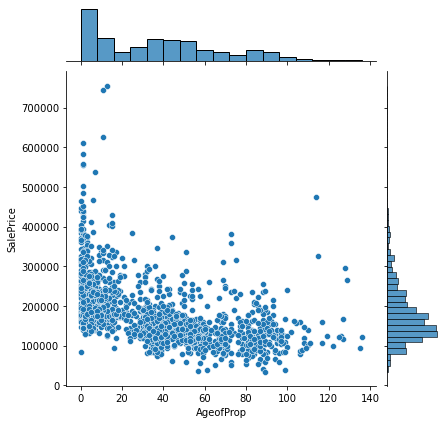

In [59]:
# PropAge vs SalePrice
sns.jointplot(x = house['AgeofProp'], y = house['SalePrice'])
plt.show()

In [60]:
#we can see age old prop correlates to less SalePrice, We can remove the features as its of no use

house.drop(labels='YrSold', axis=1,inplace=True)
house.drop(labels='MoSold', axis=1,inplace=True)


### **4. Data Transformation on Target variable**

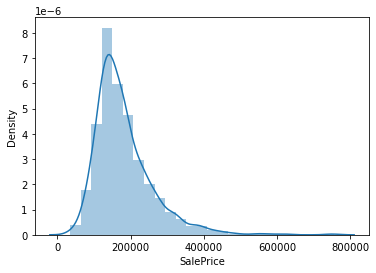

In [61]:
#checking the distribution of SalePrice #Target variable
sns.distplot(house.SalePrice,bins=25)

plt.show()

In [62]:
#data is skewed towards left, can do Log Tranformation
house['SalePrice']=np.log1p(house['SalePrice'])

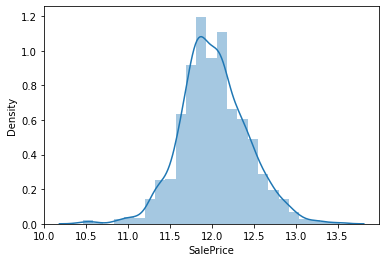

In [63]:
#checking the distribution of SalePrice
sns.distplot(house.SalePrice,bins=25)

plt.show()

### **5. Data Preparation**

In [64]:
#Drop ID column
house.drop('Id', axis=1,inplace=True)

In [65]:
#Checking all columns 
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,AgeofProp
0,60,RL,65,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,548,Average,Y,0,61,WD,Normal,12.247699,5
1,20,RL,80,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,460,Average,Y,298,0,WD,Normal,12.109016,31
2,60,RL,68,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,608,Average,Y,0,42,WD,Normal,12.317171,7
3,70,RL,60,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Unf,642,Average,Y,0,35,WD,Abnorml,11.849405,91
4,60,RL,84,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,RFn,836,Average,Y,192,84,WD,Normal,12.429220,8


In [66]:
y = house['SalePrice']

In [67]:
X = house[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Condition1',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', 'ScnFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'SaleType', 'SaleCondition', 'AgeofProp']]

In [68]:
# convert into dummies - one hot encoding
house_categorical = X.select_dtypes(include = ['object'])
house_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,YearBuilt,YearRemodAdd,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition,AgeofProp
0,RL,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,2003,2003,...,Gd,Typ,NoFireplace,Attchd,RFn,Average,Y,WD,Normal,5
1,RL,Reg,Lvl,FR2,Gtl,Feedr,1Fam,1Story,1976,1976,...,TA,Typ,TA,Attchd,RFn,Average,Y,WD,Normal,31
2,RL,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,2001,2002,...,Gd,Typ,TA,Attchd,RFn,Average,Y,WD,Normal,7
3,RL,IR1,Lvl,Corner,Gtl,Norm,1Fam,2Story,1915,1970,...,Gd,Typ,Gd,Detchd,Unf,Average,Y,WD,Abnorml,91
4,RL,IR1,Lvl,FR2,Gtl,Norm,1Fam,2Story,2000,2000,...,Gd,Typ,TA,Attchd,RFn,Average,Y,WD,Normal,8


In [69]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,AgeofProp_117,AgeofProp_119,AgeofProp_122,AgeofProp_125,AgeofProp_126,AgeofProp_127,AgeofProp_128,AgeofProp_129,AgeofProp_135,AgeofProp_136
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = X.drop(list(house_categorical.columns), axis=1)

In [71]:
X = pd.concat([X,house_dummies],axis=1)

In [72]:
X.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,ScnFlrSF,GrLivArea,BsmtFullBath,...,AgeofProp_117,AgeofProp_119,AgeofProp_122,AgeofProp_125,AgeofProp_126,AgeofProp_127,AgeofProp_128,AgeofProp_129,AgeofProp_135,AgeofProp_136
0,60,65,8450,196,706,150,856,854,1710,1,...,0,0,0,0,0,0,0,0,0,0
1,20,80,9600,0,978,284,1262,0,1262,0,...,0,0,0,0,0,0,0,0,0,0
2,60,68,11250,162,486,434,920,866,1786,1,...,0,0,0,0,0,0,0,0,0,0
3,70,60,9550,0,216,540,756,756,1717,1,...,0,0,0,0,0,0,0,0,0,0
4,60,84,14260,350,655,490,1145,1053,2198,1,...,0,0,0,0,0,0,0,0,0,0


### **6. Model Building and Evaluation**

In [73]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [74]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

7.468092495417512
[-6.27310568e-04  1.49910002e-04  2.14074524e-06  2.40041275e-05
  5.48973971e-05  3.89464011e-06  6.00680091e-05 -9.98528694e-05
  2.82148000e-04  3.54631546e-02  2.05725034e-02 -1.43646971e-03
  2.85671901e-02 -1.21019648e-02  3.06113520e-02  2.36306382e-04
  9.68675215e-05  6.03539907e-05  6.85439268e-01  6.20723201e-01
  6.63547065e-01  6.09651801e-01  2.88381284e-02  1.00497118e-02
  1.48947059e-02  1.61379935e-01  1.32614722e-01  1.15254366e-01
  3.98667521e-02 -2.17105114e-02 -3.43446198e-02 -9.82546833e-03
  2.64271062e-02 -1.77940769e-01  7.72703086e-02  1.44439774e-01
  1.77483164e-01 -1.65571132e-02  3.52784104e-02  1.40917558e-01
  1.54606206e-01  2.08574323e-01 -2.26066160e-03 -9.15120961e-02
 -5.54465391e-03  4.69730363e-02 -6.51867617e-02 -6.35752814e-02
 -1.25486367e-01  7.93451999e-02  2.24984389e-02 -4.82287629e-02
 -2.42130505e-02 -2.02546313e-14 -3.38601686e-02  2.50660603e-13
 -1.35301863e-01 -7.45066813e-02 -1.32161643e-13  1.07227385e-01
 -4.475

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9471580255053683
0.7888821725190367
8.480618182444282
15.214756805943246
0.008306188229622214
0.03473688768480193


### **7. Ridge Regression**

In [78]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [80]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.12143047e-04 -3.21414492e-04  1.15609177e-06  3.85953761e-05
 -7.83099692e-05 -5.21206551e-05  7.45288561e-05 -1.80463638e-05
  2.64863631e-04  4.24125265e-02  5.10653924e-02  3.05253921e-02
  1.40948433e-02 -4.24751589e-02  2.63133188e-02  2.29645767e-04
  1.21191725e-04 -1.95488202e-05  6.54645641e-02  2.71176230e-02
  5.17755992e-02 -4.54692988e-03  1.82356310e-02 -5.43600752e-02
  2.14231158e-03  4.95271902e-02  3.33488573e-02  4.20896262e-02
  4.73641429e-02 -1.01796453e-02  2.17262099e-03 -2.15906348e-03
  1.90842148e-02 -5.45954360e-03 -1.80902707e-02  5.80996728e-02
  2.17650808e-02 -3.25412957e-02 -1.22973070e-02  3.35346690e-02
  1.35365851e-04  1.20054212e-02 -9.54876422e-04  6.82370237e-03
 -2.30487580e-02  1.64690180e-02  1.83776598e-02 -1.56221955e-03
 -5.17294234e-03  1.10201097e-02 -9.92654317e-03 -1.76809309e-03
  4.06996979e-03  0.00000000e+00  8.32132393e-03  0.00000000e+00
 -1.00612676e-02 -1.52991377e-03  0.00000000e+00  1.07199430e-02
 -5.25108532e-03 -3.10781

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8771132168425132
0.8462402933209684
19.722122377038442
11.081094247645101
0.019316476373201216
0.025299301935262787


### **8. Lasso**

In [82]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [84]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [85]:
lasso.coef_

array([-5.99969251e-04, -3.46189867e-04,  1.05232956e-06,  4.74260474e-05,
       -5.62037664e-05, -3.27919066e-05,  6.58408727e-05, -1.57973024e-05,
        2.59623829e-04,  4.13657938e-02,  5.14669611e-02,  2.47974168e-02,
        9.97837360e-03, -4.32737755e-02,  1.66340482e-02,  2.47075256e-04,
        1.29941660e-04, -3.42935664e-05,  9.13211154e-02,  5.62102921e-03,
        5.98152139e-02, -0.00000000e+00,  0.00000000e+00, -6.62984674e-02,
       -0.00000000e+00,  3.76211646e-02,  2.88514222e-03,  2.17673509e-02,
        5.71162423e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.99081041e-03, -0.00000000e+00, -0.00000000e+00,  6.97522608e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.54295800e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.14244662e-03,  8.60208550e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.53277108e-05,  0.00000000e+00,
        0.00000000e+00,  

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.86038462927769
0.8431972822477392
22.406896464790663
11.300396776424432
0.0219460298381887
0.02579999264023843


In [87]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.947158,0.877113,0.860385
1,R2 Score (Test),0.788882,0.846240,0.843197
2,RSS (Train),8.480618,19.722122,22.406896
3,RSS (Test),15.214757,11.081094,11.300397
4,MSE (Train),0.091138,0.138984,0.148142
5,MSE (Test),0.186378,0.159058,0.160624


### **9. Observing co-efficients** 

In [88]:
betas = pd.DataFrame(index=X.columns)

In [89]:
betas.rows = X.columns

In [90]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [91]:
pd.set_option('display.max_rows', None)
betas.head(70)

,Linear,Ridge,Lasso
MSSubClass,-6.273106e-04,-0.000612,-0.000600
LotFrontage,1.499100e-04,-0.000321,-0.000346
LotArea,2.140745e-06,0.000001,0.000001
MasVnrArea,2.400413e-05,0.000039,0.000047
BsmtFinSF1,5.489740e-05,-0.000078,-0.000056
BsmtUnfSF,3.894640e-06,-0.000052,-0.000033
TotalBsmtSF,6.006801e-05,0.000075,0.000066
ScnFlrSF,-9.985287e-05,-0.000018,-0.000016
GrLivArea,2.821480e-04,0.000265,0.000260
BsmtFullBath,3.546315e-02,0.042413,0.041366


### **10. Q & A**

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

 

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

In [92]:
#Fitting Ridge model for alpha = 20*2  = 40 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

11.124001623252276
[-6.15244583e-04 -3.53362927e-04  1.05665138e-06  4.52171662e-05
 -7.23901401e-05 -5.28704832e-05  9.67720954e-05 -5.09207859e-06
  2.52632872e-04  3.90069755e-02  4.74408322e-02  2.95770669e-02
  1.11137218e-02 -3.51366532e-02  2.90587717e-02  2.54574590e-04
  1.28835386e-04 -9.64601458e-06  4.47830413e-02  1.32768753e-02
  3.60853274e-02 -1.85466723e-02  1.39101716e-02 -3.36355112e-02
 -9.47634350e-04  3.23855226e-02  1.80539956e-02  2.79224468e-02
  3.68263995e-02 -5.79011101e-03  1.73604806e-03 -2.45041762e-03
  1.24695413e-02 -4.14091140e-03 -2.03544781e-02  5.18778259e-02
  1.18925062e-02 -2.04078058e-02 -8.43423805e-03  1.89686351e-02
 -3.40300104e-04  5.74046638e-03 -2.57953858e-03 -3.50291979e-04
 -1.47834390e-02  1.73973957e-02  1.13018951e-02 -5.75431213e-04
 -3.46534622e-03  6.39274813e-03 -5.92240818e-03 -8.96799887e-04
  5.96326861e-03  0.00000000e+00  4.01724168e-03  0.00000000e+00
 -5.04046937e-03 -8.25055881e-04  0.00000000e+00  6.18628223e-03
 -3.45

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

print("For Ridge Regression Model: (Doubled alpha model: alpha:20*2 = 40)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_train_lr,"\nMSE score:",mse_train_lr,"\nRSS score:",rss1_lr,"\n")
print("\nFor Test Set:\nR2 score:",r2_test_lr,"\nMSE score:",mse_test_lr,"\nRSS score:",rss2_lr,"\n","*"*40)

0.8643516562722899
0.8406946649752853
21.770227574530534
11.480754416672376
0.02132245599856076
0.026211768074594466
For Ridge Regression Model: (Doubled alpha model: alpha:20*2 = 40)
 ****************************************

For Train Set:
R2 score: 0.8643516562722899 
MSE score: 0.02132245599856076 
RSS score: 21.770227574530534 


For Test Set:
R2 score: 0.8406946649752853 
MSE score: 0.026211768074594466 
RSS score: 11.480754416672376 
 ****************************************


In [94]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,KitchenQual_TA,-0.0589,0.0589
1,Functional_Typ,0.0562,0.0562
2,Condition1_Norm,0.0519,0.0519
3,BsmtExposure_Gd,0.0487,0.0487
4,Electrical_SBrkr,0.0480,0.0480
5,FullBath,0.0474,0.0474
6,GarageType_Attchd,0.0454,0.0454
7,MSZoning_FV,0.0448,0.0448
8,BsmtFinType1_Good,0.0440,0.0440
9,KitchenQual_Fa,-0.0435,0.0435


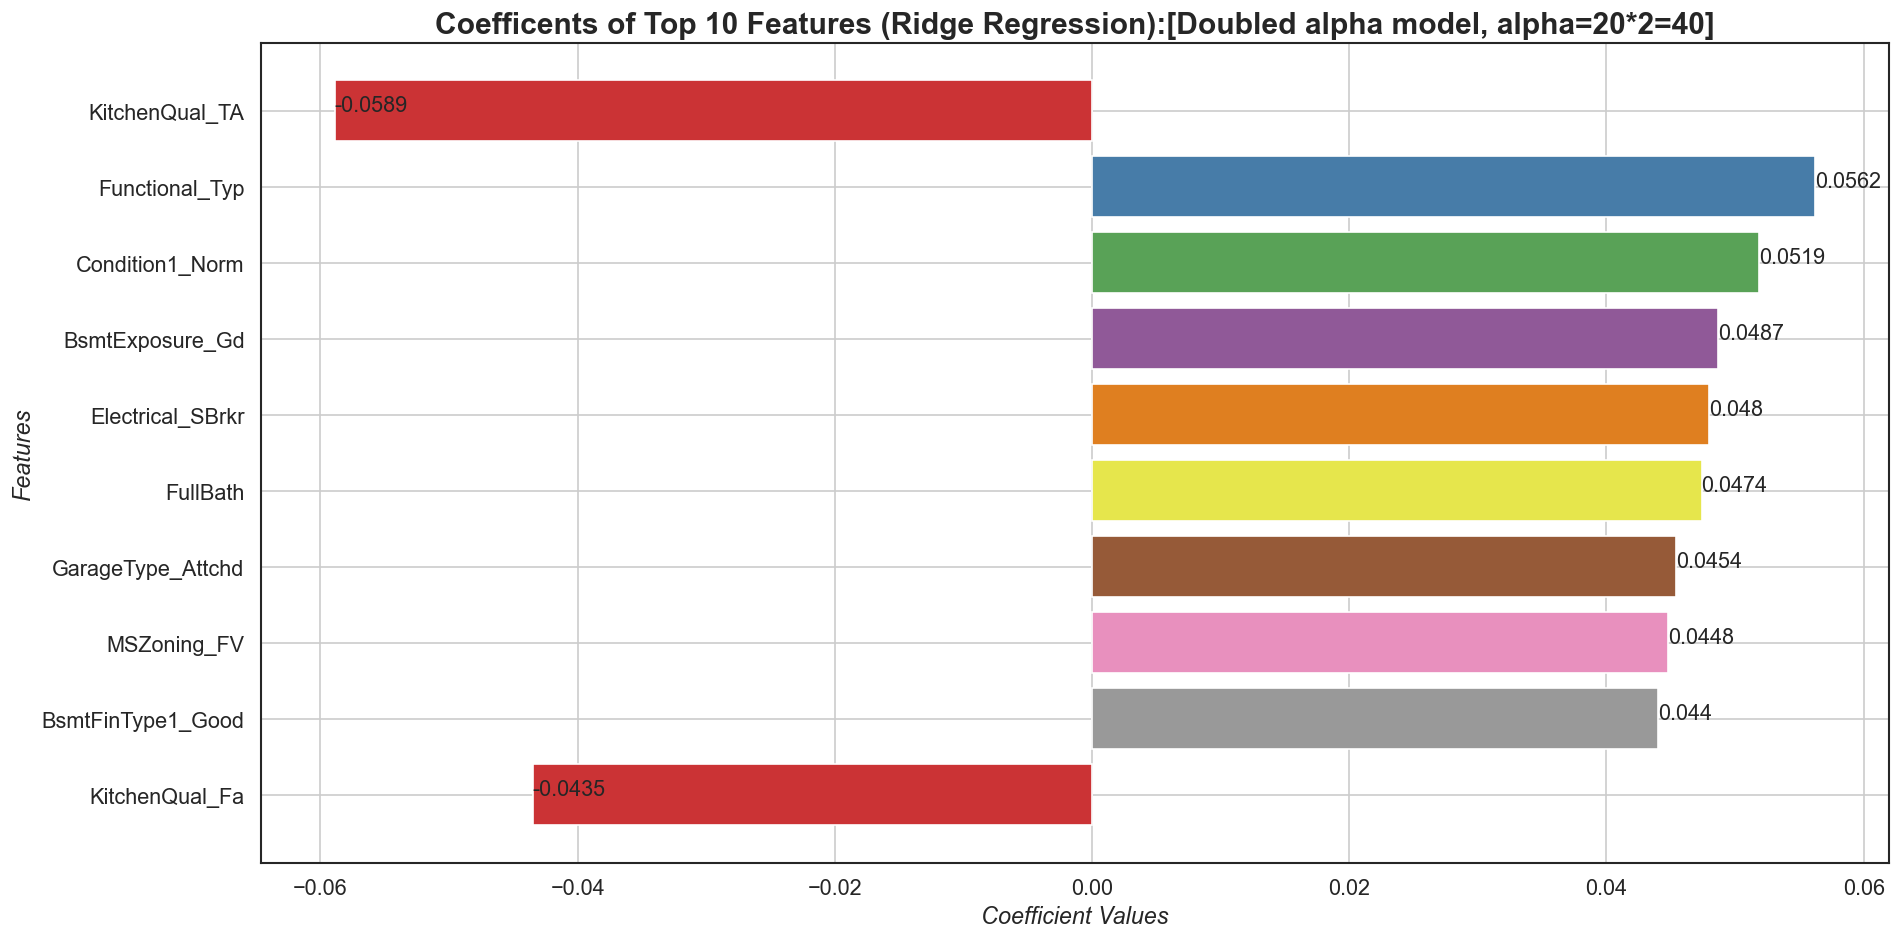

In [95]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=20*2=40]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [96]:
print("For Ridge Regression (Doubled alpha model, alpha=20*2=40): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=20*2=40): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['KitchenQual_TA', 'Functional_Typ', 'Condition1_Norm', 'BsmtExposure_Gd', 'Electrical_SBrkr', 'FullBath', 'GarageType_Attchd', 'MSZoning_FV', 'BsmtFinType1_Good', 'KitchenQual_Fa'] 
 *****************************************************************************************************************************


### Lasso 

In [97]:
#Alpha = 0.001 *2 = 0.002

#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [98]:
lasso.coef_

array([-5.65947745e-04, -3.98704563e-04,  7.64725855e-07,  6.75661274e-05,
       -5.50371197e-05, -3.54062927e-05,  1.08379882e-04,  1.07996771e-05,
        2.36216620e-04,  3.78766057e-02,  5.05146168e-02,  2.55775755e-02,
        3.68086266e-03, -4.48239677e-02,  2.55805705e-02,  2.97611209e-04,
        1.36798703e-04, -6.67523226e-06,  6.15646939e-02,  0.00000000e+00,
        5.15829046e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.81316341e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.43972896e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


print("For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_train_lr,"\nMSE score:",mse_train_lr,"\nRSS score:",rss1_lr,"\n")
print("\nFor Test Set:\nR2 score:",r2_test_lr,"\nMSE score:",mse_test_lr,"\nRSS score:",rss2_lr,"\n","*"*40)

0.8420683201074742
0.8284149659602501
25.346484284318183
12.365722950089047
0.024825156008147095
0.028232244178285498
For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)
 ****************************************

For Train Set:
R2 score: 0.8420683201074742 
MSE score: 0.024825156008147095 
RSS score: 25.346484284318183 


For Test Set:
R2 score: 0.8284149659602501 
MSE score: 0.028232244178285498 
RSS score: 12.365722950089047 
 ****************************************


In [100]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Functional_Typ,0.0710,0.0710
1,Electrical_SBrkr,0.0659,0.0659
2,Condition1_Norm,0.0644,0.0644
3,MSZoning_FV,0.0616,0.0616
4,BsmtFinType1_Good,0.0565,0.0565
5,GarageType_Attchd,0.0541,0.0541
6,BsmtExposure_Gd,0.0541,0.0541
7,KitchenQual_TA,-0.0519,0.0519
8,MSZoning_RL,0.0516,0.0516
9,ExterQual_Excellent,0.0510,0.0510


In [101]:
top5_lasso_df= list(lasso_df['Features'].iloc[:5]) #Lasso_df with top 10 coefficients
top5_lasso_df

['Functional_Typ',
 'Electrical_SBrkr',
 'Condition1_Norm',
 'MSZoning_FV',
 'BsmtFinType1_Good']

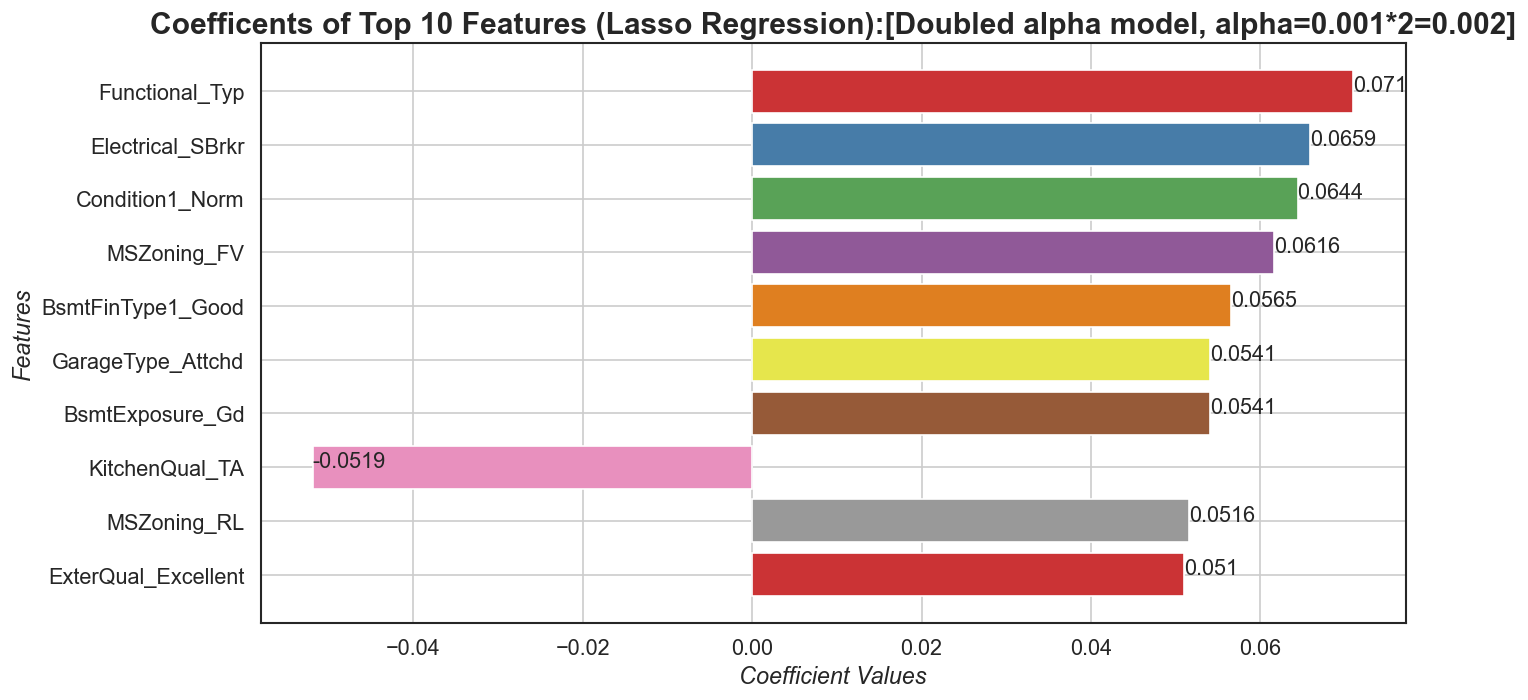

In [102]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(12,6), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.001*2=0.002]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [103]:
print("For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Functional_Typ', 'Electrical_SBrkr', 'Condition1_Norm', 'MSZoning_FV', 'BsmtFinType1_Good', 'GarageType_Attchd', 'BsmtExposure_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'ExterQual_Excellent'] 
 *****************************************************************************************************************************


In [104]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,Functional_Typ,0.0710,0.0710
1,Electrical_SBrkr,0.0659,0.0659
2,Condition1_Norm,0.0644,0.0644
3,MSZoning_FV,0.0616,0.0616
4,BsmtFinType1_Good,0.0565,0.0565
5,GarageType_Attchd,0.0541,0.0541
6,BsmtExposure_Gd,0.0541,0.0541
7,KitchenQual_TA,-0.0519,0.0519
8,MSZoning_RL,0.0516,0.0516
9,ExterQual_Excellent,0.0510,0.0510


In [105]:
top5_lasso_df= list(lasso_df['Features'].iloc[:5]) #Lasso_df with top 10 coefficients
top5_lasso_df

['Functional_Typ',
 'Electrical_SBrkr',
 'Condition1_Norm',
 'MSZoning_FV',
 'BsmtFinType1_Good']

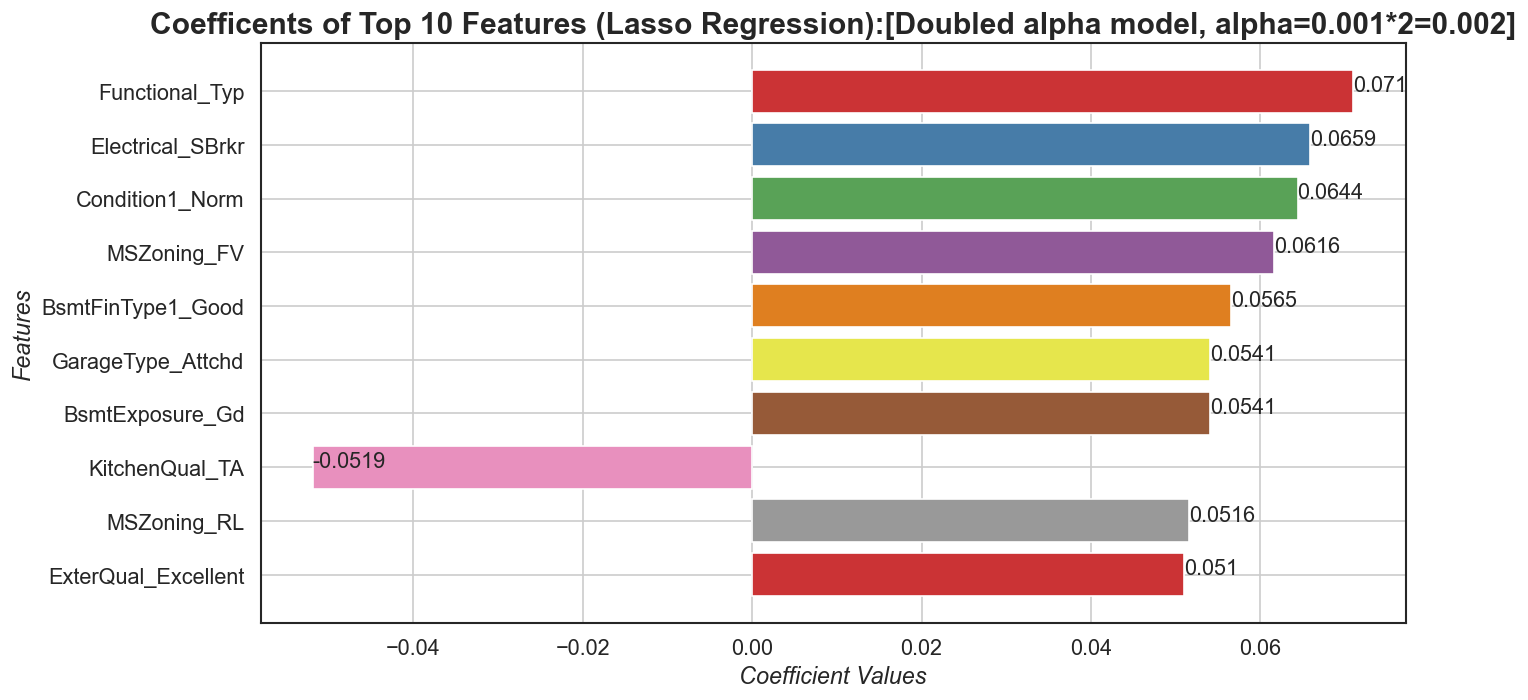

In [106]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(12,6), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):[Doubled alpha model, alpha=0.001*2=0.002]', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [107]:
print("For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*125)

For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Functional_Typ', 'Electrical_SBrkr', 'Condition1_Norm', 'MSZoning_FV', 'BsmtFinType1_Good', 'GarageType_Attchd', 'BsmtExposure_Gd', 'KitchenQual_TA', 'MSZoning_RL', 'ExterQual_Excellent'] 
 *****************************************************************************************************************************


Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer: **Please refer to the pdf**

 

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Answer: **Please refer to the pdf** <br>
Refer to this python notebook Kishore_Advanced_Regression_Question3_Answer.ipynb


 

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer: **Please refer to the pdf**
